## Исследование сотовых тарифов
Сделать анализ тарифов федерального оператора сотовой связи «Мегалайн» «Смарт» и «Ультра» на небольшой выборке клиентов -- 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше (приносит больше денег) 

## План работы:
#### 1. Открыть файлы с данными и изучить общую информацию
#### 2. Подготовка данных
2.1 Привести данные к нужным типам, найти ошибки в данных  
2.2 Посчитать для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;  
- количество отправленных сообщений по месяцам;  
- объем израсходованного интернет-трафика по месяцам;  
- помесячную выручку с каждого пользователя.  

#### 3. Проанализировать данные
Описать поведение клиентов оператора, исходя из выборки
#### 4. Проверить гипотезы
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

#### 5. Общий вывод

In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Открыть файлы с данными и изучить общую информацию

## 1.1 Просмотр таблица Users

(информация о пользователях):  
user_id — уникальный идентификатор пользователя  
first_name — имя пользователя  
last_name — фамилия пользователя  
age — возраст пользователя (годы)  
reg_date — дата подключения тарифа (день, месяц, год)  
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
city — город проживания пользователя  
tariff — название тарифного плана  

In [4]:
users = pd.read_csv('/datasets/users.csv')
users.to_csv('users.csv')
users.head(15)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [343]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Пропущенные значения есть только в колонке `churn_date` (дата прекращения пользования тарифом) -- однако, это означает, что из 500 человек, только 38 прекратили пользоваться тарифом.  
Даты представлены в строковом формате, нужно будет привести их к типу datetime.

## 2.1. Подготовка данных таблица Users

In [344]:
users['churn_date'] = pd.to_datetime(users[~users['churn_date'].isnull()]['churn_date'] ,format='%Y-%m-%d')


In [345]:
users['reg_date'] = (pd.to_datetime(users['reg_date'], format='%Y-%m-%d'))

users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [346]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


## 1.2 Просмотр таблица Calls
(информация о звонках):  
id — уникальный номер звонка  
call_date — дата звонка  
duration — длительность звонка в минутах  
user_id — идентификатор пользователя, сделавшего звонок  

In [5]:
calls = pd.read_csv('/datasets/calls.csv')
calls.to_csv('calls.csv')
calls.head(15)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [348]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Как таковых пропусков нет, нужно будет привести `id` и `call_date` к подходящим типам. Посчитаем значения с длительностью звонка 0.0

In [349]:
zero_calls = calls.query('duration == 0.0')
len(zero_calls)

39613

## 2.2 Подготовка данных таблица Calls

Нужно округлить минуты в большую сторону, ведь даже если звонок длился несколько секунд, будет считаться минута полностью.

In [350]:
calls['duration'] = calls['duration'].apply(math.ceil)
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Для удобства исследования заменим значения 0.0 на NaN

In [351]:
calls['duration'] = calls['duration'].where(~(calls['duration'] == 0.0), np.nan)
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,NaN,1000
1,1000_1,2018-08-17,NaN,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


Посмотрим количество и долю пропусков в длительности звонков у пользователей:


In [352]:
def count_empty(x):
    return x.isnull().sum()

def empty_part(x):
    return count_empty(x) / x.count() 

grouped_duration = calls.groupby('user_id')['duration'].agg([count_empty, 'count', empty_part])
grouped_duration.head()


,count_empty,count,empty_part
user_id,,,
1000,75.0,293,0.255973
1001,30.0,92,0.326087
1002,44.0,173,0.254335
1003,92.0,428,0.214953
1004,37.0,139,0.266187


(0.09, 0.5)

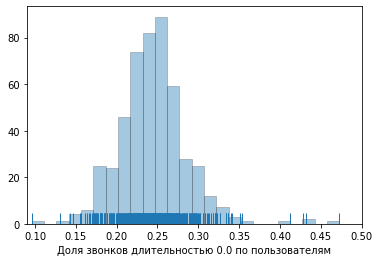

In [353]:
sns.distplot(grouped_duration['empty_part'], kde=False, bins=60, rug=True,
             hist_kws=dict(edgecolor='k', linewidth=0.5),
             axlabel='Доля звонков длительностью 0.0 по пользователям')
plt.xlim(0.09, 0.5)

В основном доля пропусков у каждого пользователя составляет 20% - 30%, что довольно существенно.  
Сложно предположить, из-за чего могли произойти такие записи да еще и в таком количестве. Скорее длительность 0.0 выглядит, как попытка позвонить, которая не увенчалась успехом.  
Так или иначе, эти нулевые минуты не принесли дохода компании, для нашего исследования они не понадобятся, оставим им NaN

Так же в таблице calls нужно заменить тип даты

In [354]:
calls['call_date'] = (pd.to_datetime(calls['call_date'], format='%Y-%m-%d'))
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,NaN,1000
1,1000_1,2018-08-17,NaN,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


In [355]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     162994 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB



### 2.2.1 Количество сделанных звонков и израсходованных минут разговора по месяцам (таблица Calls)
для каждого пользователя


Добавим к таблице колонку c месяцами

In [356]:
calls['month'] = calls['call_date'].dt.month
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,NaN,1000,7
1,1000_1,2018-08-17,NaN,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


Найдем количеством звонков и их длительность для каждого пользователя в каждом месяце

In [357]:
calls_data = calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum'])
calls_data.columns = ['calls_count', 'calls_duration']
calls_data.head(13)

calls_count  calls_duration
user_id month                             
1000    5               17           159.0
        6               28           172.0
        7               41           340.0
        8               42           408.0
        9               46           466.0
        10              44           350.0
        11              37           338.0
        12              38           333.0
1001    11              45           430.0
        12              47           414.0
1002    6               14           117.0
        7               21           214.0
        8               37           289.0

## 1.3 Просмотр таблица Messages 
(информация о сообщениях):  
id — уникальный номер сообщения  
message_date — дата сообщения  
user_id — идентификатор пользователя, отправившего сообщение  

In [6]:
messages = pd.read_csv('/datasets/messages.csv')
messages.to_csv('messages.csv')
messages.head(15)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [359]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Пропусков в данных нет, нужно только привести дату к соответствующему типу

## 2.3 Подготовка данных таблица Messages

In [360]:
messages['message_date'] = (pd.to_datetime(messages['message_date'], format='%Y-%m-%d'))
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


### 2.3.1 Количество отправленных сообщений по месяцам

Для начала добавим колонку с месяцами

In [361]:
messages['month'] = messages['message_date'].dt.month
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [362]:
messages_data = (messages
                 .pivot_table(index=['user_id', 'month'], values='id', aggfunc='count'))
messages_data.columns = ['messages_count']
messages_data.head(13)

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
        10                 73
        11                 58
        12                 70
1002    6                   4
        7                  11
        8                  13
        9                   4
        10                 10

## 1.4 Просмотр таблицы Internet
(информация об интернет-сессиях):  
id — уникальный номер сессии  
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)  
session_date — дата интернет-сессии  
user_id — идентификатор пользователя  

In [7]:
internet = pd.read_csv('/datasets/internet.csv')
internet.to_csv('internet.csv')
internet.head(15)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [364]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


Пропущенных значений нет, заменим тип у даты

## 2.4. Подготовка данных таблица Internet

In [365]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


Округлим мегабайты вверх до целых.

In [366]:
internet['mb_used'] = internet['mb_used'].apply(math.ceil)
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


### 2.4.1 Объем израсходованного интернет-трафика по месяцам

Добавим месяцы

In [367]:
internet['month'] = internet['session_date'].dt.month
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9


In [368]:
internet_data = internet.groupby(['user_id', 'month'])['mb_used'].agg(['sum'])
internet_data.columns = ['mb_sum']
internet_data.head(10)

mb_sum
user_id month        
1000    5        2256
        6       23257
        7       14016
        8       14070
        9       14581
        10      14717
        11      14768
        12       9827
1001    11      18452
        12      14053

## 1.5 Просмотр таблицы Tariffs 
(информация о тарифах):  
tariff_name — название тарифа  
rub_monthly_fee — ежемесячная абонентская плата в рублях  
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату  
messages_included — количество сообщений в месяц, включённых в абонентскую плату  
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
rub_per_message — стоимость отправки сообщения сверх тарифного пакета  
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)  

In [8]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.to_csv('tariffs.csv')
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [370]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В таблице находится общие данные о тарифах, данные представлены корректно

### 2.5 Помесячная выручка с каждого пользователя  

Объединим данные из трех таблиц

In [371]:
agregated_data = pd.concat([calls_data, messages_data, internet_data], axis=1)
agregated_data.head(13)

calls_count  calls_duration  messages_count   mb_sum
user_id month                                                      
1000    5             17.0           159.0            22.0   2256.0
        6             28.0           172.0            60.0  23257.0
        7             41.0           340.0            75.0  14016.0
        8             42.0           408.0            81.0  14070.0
        9             46.0           466.0            57.0  14581.0
        10            44.0           350.0            73.0  14717.0
        11            37.0           338.0            58.0  14768.0
        12            38.0           333.0            70.0   9827.0
1001    11            45.0           430.0             NaN  18452.0
        12            47.0           414.0             NaN  14053.0
1002    6             14.0           117.0             4.0  10871.0
        7             21.0           214.0            11.0  17601.0
        8             37.0           289.0            13.0  20347.0

In [372]:
agregated_data = agregated_data.reset_index()

In [373]:
agregated_data.head(10)

,user_id,month,calls_count,calls_duration,messages_count,mb_sum
0,1000,5,17.0,159.0,22.0,2256.0
1,1000,6,28.0,172.0,60.0,23257.0
2,1000,7,41.0,340.0,75.0,14016.0
3,1000,8,42.0,408.0,81.0,14070.0
4,1000,9,46.0,466.0,57.0,14581.0
5,1000,10,44.0,350.0,73.0,14717.0
6,1000,11,37.0,338.0,58.0,14768.0
7,1000,12,38.0,333.0,70.0,9827.0
8,1001,11,45.0,430.0,NaN,18452.0
9,1001,12,47.0,414.0,NaN,14053.0


Теперь нужно добавить данные о тарифе и городе из таблицы Users

In [374]:
prepared_users = users[['user_id', 'city', 'tariff']]
prepared_users.head()

,user_id,city,tariff
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra


In [375]:
agregated_data = agregated_data.merge(prepared_users, on='user_id')
agregated_data.head(12)

,user_id,month,calls_count,calls_duration,messages_count,mb_sum,city,tariff
0,1000,5,17.0,159.0,22.0,2256.0,Краснодар,ultra
1,1000,6,28.0,172.0,60.0,23257.0,Краснодар,ultra
2,1000,7,41.0,340.0,75.0,14016.0,Краснодар,ultra
3,1000,8,42.0,408.0,81.0,14070.0,Краснодар,ultra
4,1000,9,46.0,466.0,57.0,14581.0,Краснодар,ultra
5,1000,10,44.0,350.0,73.0,14717.0,Краснодар,ultra
6,1000,11,37.0,338.0,58.0,14768.0,Краснодар,ultra
7,1000,12,38.0,333.0,70.0,9827.0,Краснодар,ultra
8,1001,11,45.0,430.0,NaN,18452.0,Москва,smart
9,1001,12,47.0,414.0,NaN,14053.0,Москва,smart


Добавим в таблицу данные об сообщения, минутах звонков и мегабайтов сверх лимитов. Для удобства вынесем данные о тарифах в словарь `tariff_data`, к которому будем обращаться при расчете выручки и лимитов в зависимости от тарифа

In [376]:
tariff_dict = tariffs.to_dict('index')
tariff_data = {
    'smart': tariff_dict[0],
    'ultra': tariff_dict[1],
}
tariff_data

{'smart': {'messages_included': 50,
  'mg_per_month_included': 15360,
  'minutes_included': 500,
  'rub_monthly_fee': 550,
  'rub_per_gb': 200,
  'rub_per_message': 3,
  'rub_per_minute': 3,
  'tariff_name': 'smart'},
 'ultra': {'messages_included': 1000,
  'mg_per_month_included': 30720,
  'minutes_included': 3000,
  'rub_monthly_fee': 1950,
  'rub_per_gb': 150,
  'rub_per_message': 1,
  'rub_per_minute': 1,
  'tariff_name': 'ultra'}}

In [377]:
def over_messages(row):
    difference = row['messages_count'] - tariff_data[row['tariff']]['messages_included']
    if difference > 0:
        return difference
    else:
        return 0

def over_calls(row):
    difference = row['calls_duration'] - tariff_data[row['tariff']]['minutes_included']
    if difference > 0:
        return difference
    else:
        return 0
    

def over_mb(row):
    difference = row['mb_sum'] - tariff_data[row['tariff']]['mg_per_month_included']
    if difference > 0:
        return difference
    else:
        return 0
    

agregated_data['over_messages'] = agregated_data.apply(over_messages, axis=1)
agregated_data['over_calls'] = agregated_data.apply(over_calls, axis=1)
agregated_data['over_mb'] = agregated_data.apply(over_mb, axis=1)
agregated_data.head(13)
    

,user_id,month,calls_count,calls_duration,messages_count,mb_sum,city,tariff,over_messages,over_calls,over_mb
0,1000,5,17.0,159.0,22.0,2256.0,Краснодар,ultra,0.0,0.0,0.0
1,1000,6,28.0,172.0,60.0,23257.0,Краснодар,ultra,0.0,0.0,0.0
2,1000,7,41.0,340.0,75.0,14016.0,Краснодар,ultra,0.0,0.0,0.0
3,1000,8,42.0,408.0,81.0,14070.0,Краснодар,ultra,0.0,0.0,0.0
4,1000,9,46.0,466.0,57.0,14581.0,Краснодар,ultra,0.0,0.0,0.0
5,1000,10,44.0,350.0,73.0,14717.0,Краснодар,ultra,0.0,0.0,0.0
6,1000,11,37.0,338.0,58.0,14768.0,Краснодар,ultra,0.0,0.0,0.0
7,1000,12,38.0,333.0,70.0,9827.0,Краснодар,ultra,0.0,0.0,0.0
8,1001,11,45.0,430.0,NaN,18452.0,Москва,smart,0.0,0.0,3092.0
9,1001,12,47.0,414.0,NaN,14053.0,Москва,smart,0.0,0.0,0.0


После добавления количества услуг сверх лимита тарифа можем посчитать выручку

In [378]:
def tariff_revenue(row):
    tariff = tariff_data[row['tariff']]
    count_all = (row['over_messages'] * tariff['rub_per_message'] + 
                 row['over_calls'] * tariff['rub_per_minute'] + 
                 (math.ceil(row['over_mb'] / 1024)) * tariff['rub_per_gb'] + 
                 tariff['rub_monthly_fee'])
    return count_all

agregated_data['tariff_revenue'] = agregated_data.apply(tariff_revenue, axis=1)
agregated_data.head(13)

,user_id,month,calls_count,calls_duration,messages_count,mb_sum,city,tariff,over_messages,over_calls,over_mb,tariff_revenue
0,1000,5,17.0,159.0,22.0,2256.0,Краснодар,ultra,0.0,0.0,0.0,1950.0
1,1000,6,28.0,172.0,60.0,23257.0,Краснодар,ultra,0.0,0.0,0.0,1950.0
2,1000,7,41.0,340.0,75.0,14016.0,Краснодар,ultra,0.0,0.0,0.0,1950.0
3,1000,8,42.0,408.0,81.0,14070.0,Краснодар,ultra,0.0,0.0,0.0,1950.0
4,1000,9,46.0,466.0,57.0,14581.0,Краснодар,ultra,0.0,0.0,0.0,1950.0
5,1000,10,44.0,350.0,73.0,14717.0,Краснодар,ultra,0.0,0.0,0.0,1950.0
6,1000,11,37.0,338.0,58.0,14768.0,Краснодар,ultra,0.0,0.0,0.0,1950.0
7,1000,12,38.0,333.0,70.0,9827.0,Краснодар,ultra,0.0,0.0,0.0,1950.0
8,1001,11,45.0,430.0,NaN,18452.0,Москва,smart,0.0,0.0,3092.0,1350.0
9,1001,12,47.0,414.0,NaN,14053.0,Москва,smart,0.0,0.0,0.0,550.0


## 3. Проанализировать данные
Описать поведение клиентов оператора, исходя из выборки.  
Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?  
Посчитать среднее количество, дисперсию и стандартное отклонение.  
Построить гистограммы. Описать распределения.  

In [379]:
smart_all = agregated_data.query('tariff == "smart"')
ultra_all = agregated_data.query('tariff == "ultra"')

### 3.1 Среднее, дисперсия и стандартное отклонение для тарифов

In [380]:
(agregated_data
 .pivot_table(index='tariff', values=['calls_duration', 'messages_count', 'mb_sum'],
              aggfunc=['mean', 'median', 'var', 'std']))


mean                                      median           \
       calls_duration        mb_sum messages_count calls_duration   mb_sum   
tariff                                                                       
smart      419.062978  16236.472621      38.716441          423.0  16532.0   
ultra      545.451104  19686.767179      61.161006          528.0  19411.0   

                                 var                               \
       messages_count calls_duration        mb_sum messages_count   
tariff                                                              
smart            34.0   35844.189551  3.444310e+07     717.594201   
ultra            51.0   94203.418396  9.904344e+07    2109.659183   

                  std                              
       calls_duration       mb_sum messages_count  
tariff                                             
smart      189.325618  5868.824472      26.787949  
ultra      306.925754  9952.057054      45.931026

In [381]:

print('Число клиентов тарифа smart: ', len(smart_all))
print('Число клиентов тарифа ultra: ', len(ultra_all))

Число клиентов тарифа smart:  2229
Число клиентов тарифа ultra:  985


In [382]:
def hist_comparer(parametr, limit, bin_q, label):
    plt.figure(figsize=(12,6))
    ax = (sns.distplot(agregated_data[agregated_data['tariff'] == 'smart'][parametr],
               bins=bin_q, kde=False, label='Тариф Смарт'))
    (sns.distplot(agregated_data[agregated_data['tariff'] == 'ultra'][parametr],
               bins=bin_q, axlabel=label, label='Тариф Ультра', kde=False, ax=ax))
    ax.set(ylabel='Частота')
    plt.xlim(limit)
    plt.legend()


    
    

### 3.2 Количество отправленных сообщений

среднее: smart - 39 ultra - 61


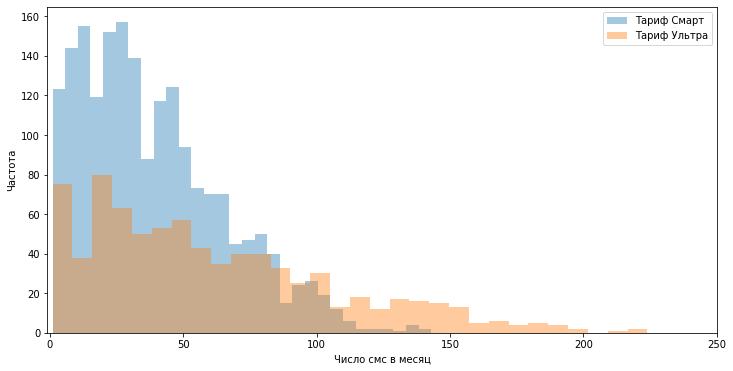

In [383]:
hist_comparer('messages_count', (-1, 250), 30, 'Число смс в месяц')
print('среднее: smart - 39 ultra - 61')

In [384]:
smart_all['messages_count'].describe()

count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: messages_count, dtype: float64

In [385]:
ultra_all['messages_count'].describe()

count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
Name: messages_count, dtype: float64

### 3.3. Длительность звонков

среднее: smart - 419 ultra - 545


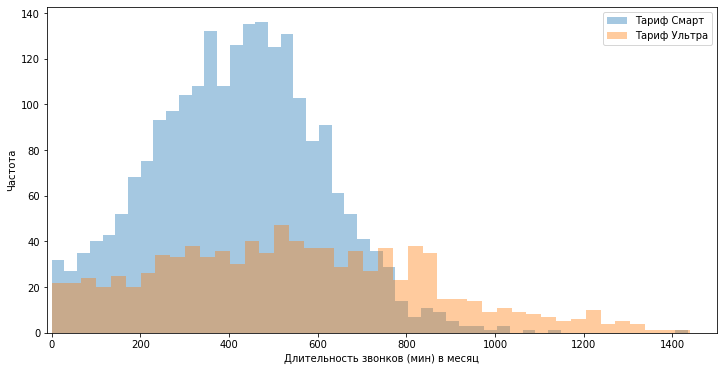

In [386]:
hist_comparer('calls_duration', (-10, 1500), 50, 'Длительность звонков (мин) в месяц')
print('среднее: smart - 419 ultra - 545')

In [387]:
smart_all['calls_duration'].describe()

count    2223.000000
mean      419.062978
std       189.325618
min         0.000000
25%       285.000000
50%       423.000000
75%       545.500000
max      1435.000000
Name: calls_duration, dtype: float64

In [388]:
ultra_all['calls_duration'].describe()

count     951.000000
mean      545.451104
std       306.925754
min         0.000000
25%       310.000000
50%       528.000000
75%       756.500000
max      1673.000000
Name: calls_duration, dtype: float64

### 3.4 Интернет траффик

среднее: smart - 16236 ultra - 19686


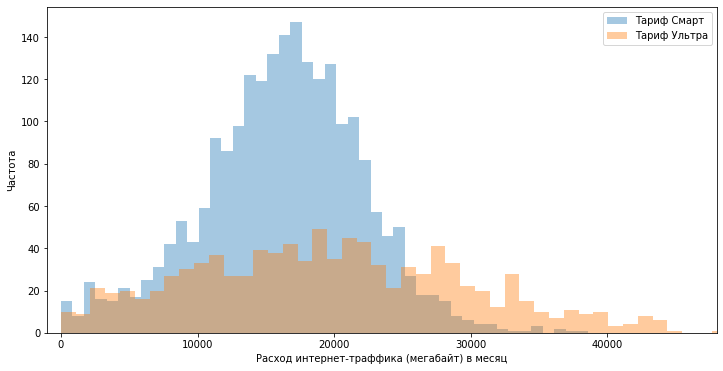

In [389]:
hist_comparer('mb_sum', (-1000, 48000), 46, 'Расход интернет-траффика (мегабайт) в месяц')

print('среднее: smart - 16236 ultra - 19686')

In [390]:
smart_all['mb_sum'].describe()

count     2228.000000
mean     16236.472621
std       5868.824472
min          0.000000
25%      12668.500000
50%      16532.000000
75%      20068.000000
max      38610.000000
Name: mb_sum, dtype: float64

In [391]:
ultra_all['mb_sum'].describe()

count      975.000000
mean     19686.767179
std       9952.057054
min          0.000000
25%      12020.500000
50%      19411.000000
75%      26920.500000
max      49789.000000
Name: mb_sum, dtype: float64

In [392]:
agregated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 12 columns):
user_id           3214 non-null int64
month             3214 non-null int64
calls_count       3174 non-null float64
calls_duration    3174 non-null float64
messages_count    2717 non-null float64
mb_sum            3203 non-null float64
city              3214 non-null object
tariff            3214 non-null object
over_messages     3214 non-null float64
over_calls        3214 non-null float64
over_mb           3214 non-null float64
tariff_revenue    3214 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 326.4+ KB


В обобщенной таблице есть пропуски по количеству отправленных смс, длительности звонков и  интернет трафику. В объединенной таблице они возникли из-за того, что в каких-то месяцах данных по указаным услугам не было, можно сказать, что пользователи не воспользовались ими.  
497 пропусков по смс (3214 - 2717)  
11 по интеренет траффику (3214 - 3203)  
40 по звонкам (3214 - 3174)

Пропуски в смс (получается, что это месяцы, в которых тот или иной пользователь просто не воспользовались услугой) говорят о том, что даная услуга не является достаточно востребованной у клиентов.

Пользователей тарифа Смарт в почти два раза больше пользователей тарифа Ультра, однако, пользователи тарифа Ультра больше тратят минут, смс и мегабайт услуг в месяц. Можно сказать, что пользователи тарифа Ультра более равномерно используют услуги, примерно одинаковая плотность и у небольшого и у солидного объема пользования услугами.  
Для пользователей тарифа Смарт характерны излюбленные объемы услуг в месяц:  
звонки - от 200 до 550 минут  
интернет - от 10000 до 24000 мб  
смс - в пределах 65 

По тарифу Смарт следующие ограничения для  
смс / интернет / звонки  
50 / 15360	/  500	  
Есть доля пользователей тарифа Смарт, выходящих за лимит траффика. 

Для пользователей тарифа Ультра характерны можно выделить следующие диапазоны основного пользования:  
звонки - от 100 до 900 минут  
интернет - от 8000 до 34000 мб  
смс - в пределах 100

смс   / интернет / звонки  
1000 / 30720 / 3000	
И тут есть пользователи выходящии за лимит мегабайт

С точки зрения прибыльности тариф Ультра является более привлекательным для компании.

## 4. Проверка гипотез

### 4.1. Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Чтобы проверить, что в выручках действительно есть изменения, а не шум в данных проведем тест, сформулируем `нулевую гипотезу` -- `"Cредняя выручка пользователей тарифов «Ультра» и «Смарт» не различается"`.
Нулевая гипотеза формулируется с знаком равенства, то есть какая-то величина не изменилась.  
Посмотрим на среднюю выручку и дисперсию тарифов


In [393]:
(agregated_data
 .pivot_table(index='tariff', values='tariff_revenue', aggfunc=['mean', 'median', 'std']))

,mean,median,std
,tariff_revenue,tariff_revenue,tariff_revenue
tariff,,,
smart,1294.63930,1038.0,820.933202
ultra,2071.06599,1950.0,378.802377


В наших выборках доход от тарифов различается, в среднем от тарифа Ультра в месяц комания получает больше выручки.  
Проведем t-тест

In [159]:
results = st.ttest_ind(smart_all['tariff_revenue'], ultra_all['tariff_revenue'])
results.pvalue

2.9776448000521676e-158

2.977 в 10 в -158 степени, какой бы уровень значимости мы бы не выдвигали, p-value в любом случае туда поместится, так что отвергнем нулевую гипотезу. Выручка от тарифов различается.  
Это можно объяснить как минимум тем, что стоимость тарифа Ультра значительно выше Смарт, и даже если в тарифе Смарт будут какие-то превышения, то общая стоимость тарифа Ультра их все равно перевесит.


### 4.2 Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Для проверки действительности разности проведем t-тест, сформулируем `нулевую гипотезу` исходя из соображения, что среднии равны: `"Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов"`

In [337]:
msk = agregated_data.query('city == "Москва"')
regions = agregated_data.query('city != "Москва"')

In [161]:
regions['tariff_revenue'].describe()


count    2603.000000
mean     1528.316942
std       810.411374
min       550.000000
25%       750.000000
50%      1587.000000
75%      1950.000000
max      6770.000000
Name: tariff_revenue, dtype: float64

In [162]:
msk['tariff_revenue'].describe()

count     611.000000
mean     1550.805237
std       752.451347
min       550.000000
25%       798.000000
50%      1750.000000
75%      1950.000000
max      5321.000000
Name: tariff_revenue, dtype: float64

Средний доход в выборках в Москве немного первышает доход в регионах

In [163]:
area_alpha = 0.05
area_results = st.ttest_ind(msk['tariff_revenue'], regions['tariff_revenue'])
area_results.pvalue

0.531666503831252

Значение p-value превышает уровень значимости, примем нулевую гипотезу: "Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов"

Проверим, есть ли выбросы в выборках, уберем их, и снова проведем тест.

(0, 3800)

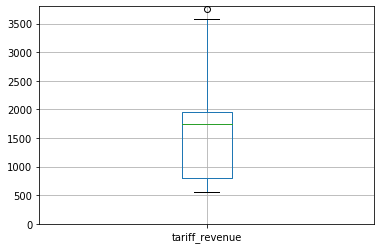

In [165]:
msk.boxplot('tariff_revenue')
plt.ylim(0, 3800)

In [166]:
msk_clean = msk.query('tariff_revenue < 3600')

(0, 3800)

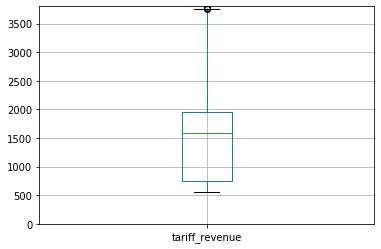

In [167]:
regions.boxplot('tariff_revenue')
plt.ylim(0, 3800)

In [168]:
regions_clean = regions.query('tariff_revenue < 3800')

In [169]:
area_clean_results = st.ttest_ind(msk_clean['tariff_revenue'], regions_clean['tariff_revenue'])
area_clean_results.pvalue

0.30929205476570953

После очистки от выбросов все еще можно принять нулевую гипотезу, о том, что средняя выручка в Москве и регионах не отличается

## 5. Вывод
В исследовании мы собирались проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
Тарифом Ультра пользуются 985 человек, тарифом Смарт -- 2229.  
- Проведя сравнения пользованием услуг в месяц можно увидеть, что пользователи тарифа Ультра в среднем больше тратят минут, мегабайт, смс в месяц:
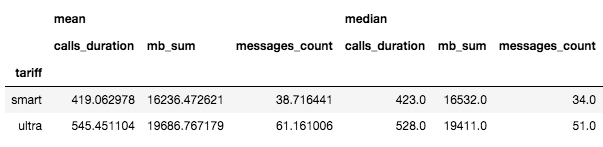

- Пользователи обоих тарифов выходят за лимит по части интернет траффика:

Смарт в месяц:  
интернет - от 10000 до 24000 мб  / лимит 15360  

Ультра:  
интернет - от 8000 до 34000 мб  / лимит 30720 

- Ежемесячная выручка компании больше по тарифу Ультра
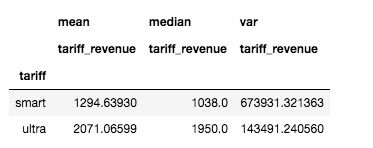
С  точки зрения доходности в месяц лидирует тариф ультра, осталось только перевести на него всех других пользователей.  

Если бы компании нужно было бы формировать новый тариф, стоило бы уменьшить в нем пакет смс -- эта услуга не так сильно пользуется спросом, в отличие от интернета. И в том и другом тарифе есть превышение лимитов по мегабайтам, возможно можно было бы использовать более разнообразную градацию оплаты интернета. Однако, тут не понятна политика компании -- ведь выход за пределы лимита -- дополнительный доход.